## In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

### Load data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
dataset = keras.datasets.cifar10.load_data()

In [3]:
(x_train, y_train), (x_test, y_test) = dataset

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.ravel()
y_test = y_test.ravel()


In [126]:
def plot(X, Y, idx):
    plt.figure(figsize=(8,1))
    plt.axis('off')
    plt.imshow(X[idx])
    plt.title(classes[Y[idx]])

In [8]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]


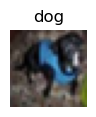

In [9]:
plot(x_train, y_train, 27)

In [10]:
classes[y_train[6]]

'bird'

In [11]:
#normalise
x_train = x_train/255
x_test = x_test/255

In [32]:
#ANN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1000, activation='relu'),
                         keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
                         ])
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.2977 - loss: 1.9442
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 106s 68ms/step - accuracy: 0.3669 - loss: 1.7751
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.3891 - loss: 1.7083
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 64ms/step - accuracy: 0.4106 - loss: 1.6593
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.4238 - loss: 1.6277


In [35]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.4205 - loss: 1.6264


[1.6264467239379883, 0.4205000102519989]

In [72]:
y_pred_ann = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [96]:
y_pred_ann[:5]

array([[2.91781779e-02, 1.26837939e-01, 6.51935339e-02, 2.78542727e-01,
        2.37642024e-02, 1.52444854e-01, 1.94162026e-01, 1.10711828e-02,
        7.83984363e-02, 4.04070094e-02],
       [2.75440030e-02, 2.40562946e-01, 7.57790054e-04, 1.32392265e-03,
        7.06175226e-04, 7.06872321e-04, 3.83644248e-04, 1.41897937e-03,
        1.42530993e-01, 5.84064722e-01],
       [9.26262662e-02, 2.27356419e-01, 2.43018917e-03, 2.80352123e-03,
        2.16465443e-03, 1.89595891e-03, 2.01761723e-04, 4.10402380e-03,
        3.41637045e-01, 3.24780196e-01],
       [1.84350476e-01, 1.68501839e-01, 1.89386085e-02, 1.38448868e-02,
        1.95802394e-02, 1.20729227e-02, 4.46526520e-03, 4.00845148e-02,
        3.80491793e-01, 1.57669500e-01],
       [1.36617217e-02, 2.01864354e-02, 1.15203544e-01, 8.31729844e-02,
        3.29976052e-01, 9.43736583e-02, 2.25684404e-01, 8.29859227e-02,
        1.75723061e-02, 1.71829499e-02]], dtype=float32)

In [90]:
#y_pred_ann = np.argmax(y_pred_ann)

y_prediction = [np.argmax(i) for i in y_pred_ann]

In [100]:
y_test[:8]

array([3, 8, 8, 0, 6, 6, 1, 6], dtype=uint8)

In [102]:
y_prediction[:8]

[3, 9, 8, 8, 4, 6, 3, 6]

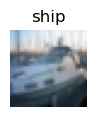

In [144]:
plot(x_test, y_prediction, 2)

In [98]:
from sklearn.metrics import confusion_matrix , classification_report

report = classification_report(y_test, y_prediction)
print(report)

              precision    recall  f1-score   support

           0       0.62      0.34      0.44      1000
           1       0.47      0.58      0.52      1000
           2       0.47      0.09      0.15      1000
           3       0.35      0.23      0.27      1000
           4       0.49      0.25      0.33      1000
           5       0.38      0.34      0.36      1000
           6       0.42      0.59      0.49      1000
           7       0.42      0.56      0.48      1000
           8       0.60      0.50      0.55      1000
           9       0.30      0.72      0.42      1000

    accuracy                           0.42     10000
   macro avg       0.45      0.42      0.40     10000
weighted avg       0.45      0.42      0.40     10000



#### ANN gives accuracy  42% on train set and  42% on test set for 5 epochs.

In [148]:
## Now make CNN model
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn.fit(x_train, y_train, epochs=5)

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.2881 - loss: 1.9753
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4338 - loss: 1.5848
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4938 - loss: 1.4181
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5333 - loss: 1.3160
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5660 - loss: 1.2303


In [149]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5440 - loss: 1.2736


[1.2735755443572998, 0.5440000295639038]

In [152]:
y_pred = cnn.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [158]:
from sklearn.metrics import confusion_matrix , classification_report
y_predictions = [np.argmax(e) for e in y_pred]
report = classification_report(y_test, y_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.75      0.63      1000
           1       0.73      0.63      0.68      1000
           2       0.49      0.39      0.43      1000
           3       0.36      0.41      0.38      1000
           4       0.62      0.32      0.42      1000
           5       0.34      0.70      0.45      1000
           6       0.75      0.51      0.61      1000
           7       0.69      0.56      0.62      1000
           8       0.82      0.50      0.62      1000
           9       0.60      0.67      0.63      1000

    accuracy                           0.54     10000
   macro avg       0.59      0.54      0.55     10000
weighted avg       0.59      0.54      0.55     10000



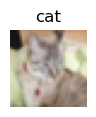

In [164]:
plot(x_test, y_predictions, 8)